## Target

**BeatsPerMinute** - It is a numeric-quantitative-discrete variable. So, consedering the EDA´s conclusion, a non-linear model is the best option to predict this target.

## Model

Adding the size of the datasets, a neural net could be a overfitting model, so I´m gonna use a Gradient Boosting Regressor, because it is a robust and useful in casas when there isn´t a linear correlation between the features.

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import joblib

In [3]:
#Load Train.csv
PATH = os.path.join('..','..','data','train')
train = pd.read_csv(PATH)
print(train.shape)
train.head()

(524164, 11)


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
#Load Test
PATH2 = os.path.join('..','..','data','test')
test = pd.read_csv(PATH2)
print(test.shape)
test.head()

(174722, 10)


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [5]:
#Spliting Features and Target
X_train = train.iloc[:, 1:10]
y_train = train.iloc[: , 10:11]

X_test = test.iloc[:, 1:10]

In [7]:
#Defining the parameters for the GridSearchCV with GradientBoostingRegressor
parameters = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None,3, 6],
    'learning_rate': [0.1, 0.2]
}

#Fitting process
grid_search = GridSearchCV(GradientBoostingRegressor(), parameters, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\rodrigo.cordeiro\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.2, n_estimators=20)

In [14]:
#Predicting the bpm for the test.csv
y_pred = best_model.predict(X_test)
y_pred = y_pred.round(2)
print(y_pred)

[119.18 118.66 119.41 ... 118.87 118.9  119.15]


In [15]:
#Adding the preditec BPM in test.csv
final_test = test.copy()
final_test['BeatsPerMinute'] = y_pred
final_test.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867,119.18
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000,118.66
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067,119.41
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467,119.19
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067,119.12


In [ ]:
#Creating the submission.csv file
final_test = final_test.loc[:,['id','BeatsPerMinute']]

sub_path = os.path.join('..','deliver','submission.csv')
final_test.to_csv(sub_path, index=False)

In [25]:
#Saving the model in models
joblib.dump(best_model, '../../models/bpm_gradientboostingregressor_model.pkl')

['../../models/bpm_gradientboostingregressor_model.pkl']

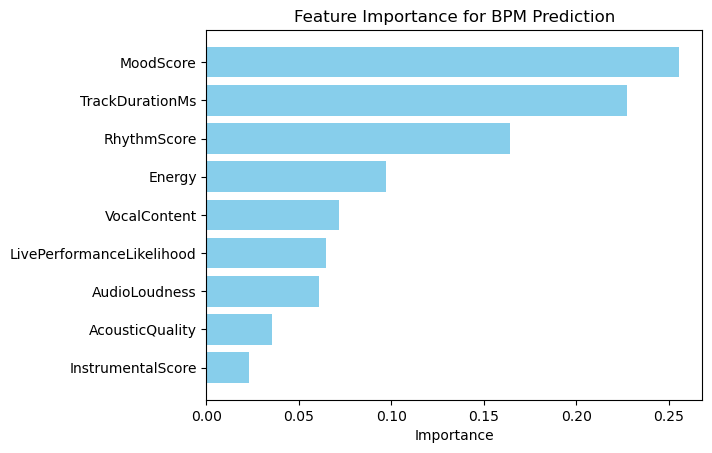

In [26]:
#Feature Importance

importances = best_model.feature_importances_
features_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for BPM Prediction')
plt.gca().invert_yaxis()
plt.savefig('../deliver/predict_feature_importance.png', dpi=300, bbox_inches='tight')

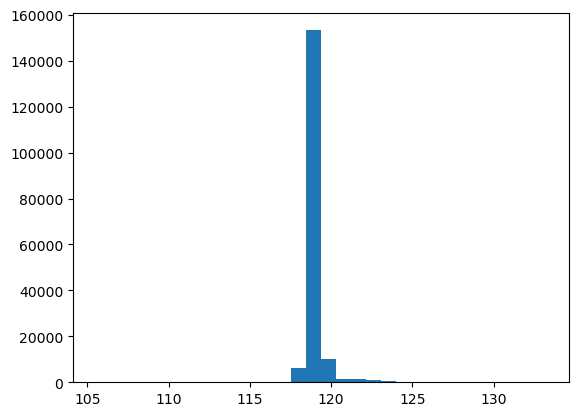

In [28]:
#BPM Distribution

plt.hist(y_pred, bins=30)
plt.savefig('../deliver/predict_bpm_distrib.png', dpi=300, bbox_inches='tight')